In [738]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 4.0.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
pandas 0.16.2
Sun Sep 20 21:42:37 2015 PDT

In [739]:
!pwd

/Users/berkeleyalmand/repos/ski_in_solitude


[autoreload of version_information failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named version_information
]


In [818]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import time

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import traffic data

In [844]:
df_traf = pd.DataFrame.from_csv('../data_ski_in_solitude/all_skier_counts.csv')

In [845]:
df_traf.tail()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2015-04-22,1958,1950,2,-4053
2015-04-23,1747,1977,3,-3823
2015-04-24,2223,3877,4,-2169
2015-04-25,2606,3399,5,-1376
2015-04-26,4610,2103,6,-3883


# Import snow data

In [846]:
df_met = pd.DataFrame.from_csv('../data_ski_in_solitude/all_snowfall.csv')

In [847]:
df_met.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,mon_day,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
valid_at,,,,,,,,,,,,,
2011-11-10 06:14:00,0,15,0,0,0,11/10,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-12 05:56:00,0,18,0,0,0,11/12,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-13 05:49:00,1,18,0,0,0,11/13,1,NaN,0,NaN,NaN,NaN,NaN
2011-11-14 05:52:00,3,18,0,0,0,11/14,4,NaN,1,1,NaN,NaN,NaN
2011-11-15 05:54:00,0,18,0,0,0,11/15,4,NaN,4,4,4,NaN,NaN


In [848]:
resamp_time = '1440Min'
df_met = df_met.resample(resamp_time)

In [849]:
df_met.head()

,new_24,basedepth,open_trails,open_lifts,open_percent,tot_snow,week_snow_tot,2day_snow_tot,3day_snow_tot,4day_snow_tot,5day_snow_tot,6day_snow_tot
valid_at,,,,,,,,,,,,
2011-11-10,0,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-12,0,18,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-13,1,18,0,0,0,1,NaN,0,NaN,NaN,NaN,NaN
2011-11-14,3,18,0,0,0,4,NaN,1,1,NaN,NaN,NaN


## Combine the traffic and met data.

In [850]:
df_all = df_traf.join(df_met,how='outer')

#### Drop to and from traffic data

In [852]:
df_all.drop(['to_WP', 'away_WP'], axis=1, inplace=True)

In [867]:
df_all.to_csv('../data_ski_in_solitude/all_combined_data.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1591f9e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15bf773d0>]], dtype=object)

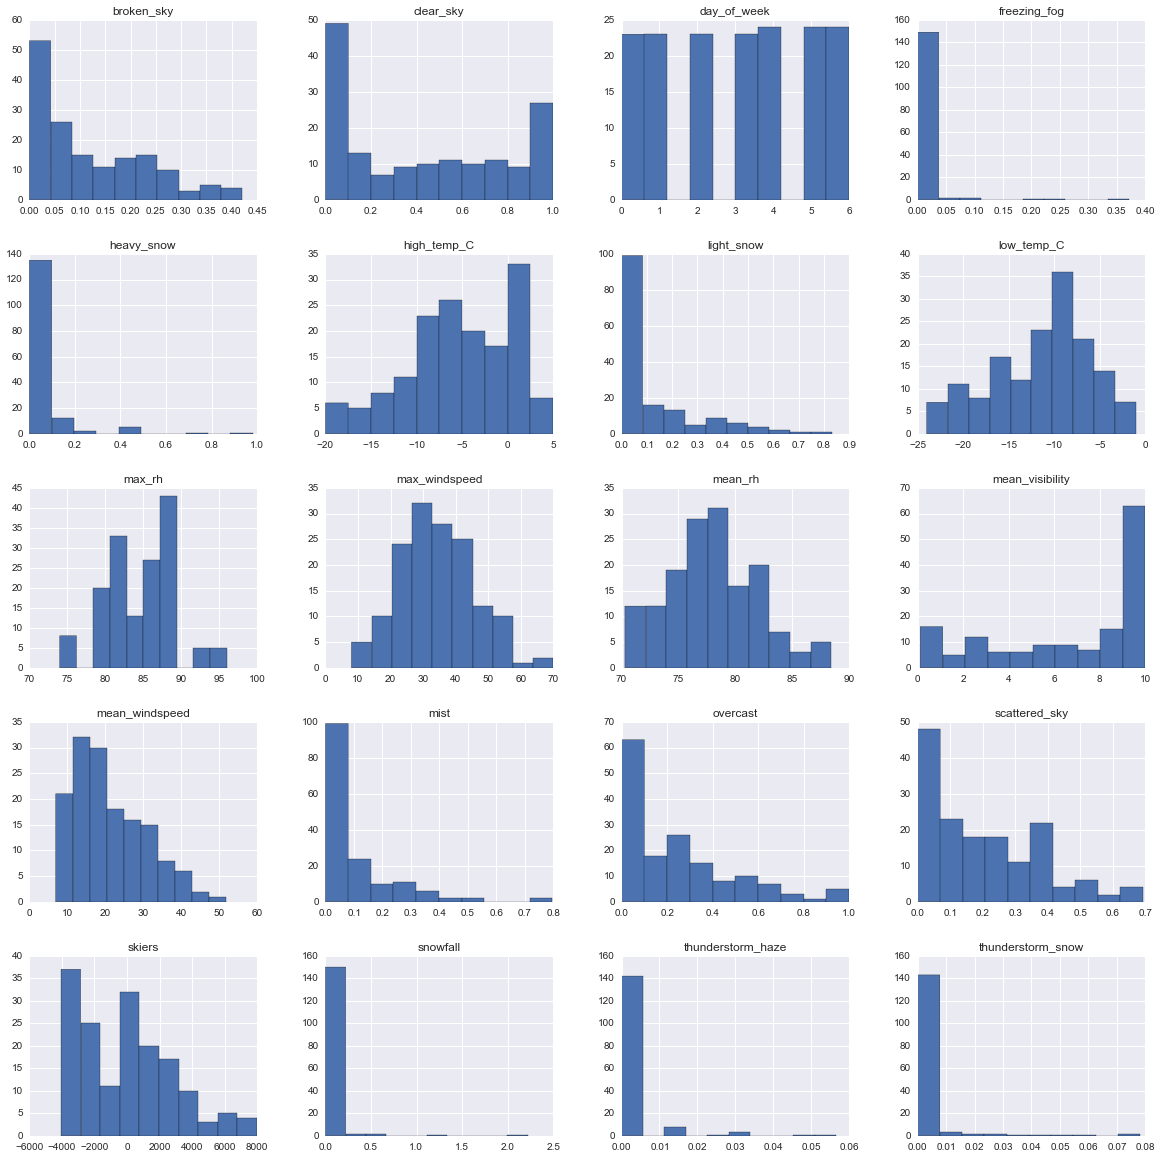

In [749]:
df_all.hist(figsize=(20,20), xlabelsize = 10, ylabelsize = 10)

#### Create a crowd yesterday column

In [750]:
#df_all['crowd_yest'] = df_all.skiers.shift(1)

In [751]:
df_all.head()

,day_of_week,skiers,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
2014-11-01,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,0.138889,0.000000,0.00,5,-1,37,18.270270,96,88.430556,10.000000
2014-11-02,NaN,NaN,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,0.289855,0.115942,0.06,-1,-6,36,15.444444,96,86.623188,8.623188
2014-11-03,NaN,NaN,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,0.080645,0.725806,0.14,-6,-11,33,16.163265,92,85.919355,2.281250
2014-11-04,NaN,NaN,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,0.000000,0.291667,0.45,-5,-13,44,19.014286,96,83.986111,9.425000
2014-11-05,NaN,NaN,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,0.055556,0.208333,0.00,-1,-10,43,19.628571,92,84.708333,9.013889


#### Create dummy variables for days of the week.

In [752]:
df_all = pd.concat([df_all, pd.get_dummies(df_all.day_of_week, prefix='day')], axis=1)

In [753]:
df_all.head()

,day_of_week,skiers,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,...,max_rh,mean_rh,mean_visibility,day_0.0,day_1.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0
2014-11-01,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,...,96,88.430556,10.000000,0,0,0,0,0,0,0
2014-11-02,NaN,NaN,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,...,96,86.623188,8.623188,0,0,0,0,0,0,0
2014-11-03,NaN,NaN,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,...,92,85.919355,2.281250,0,0,0,0,0,0,0
2014-11-04,NaN,NaN,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,...,96,83.986111,9.425000,0,0,0,0,0,0,0
2014-11-05,NaN,NaN,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,...,92,84.708333,9.013889,0,0,0,0,0,0,0


#### Drop day of week column

In [754]:
df_all = df_all.drop(['day_of_week'], axis=1)

#### Make month column

In [755]:
df_all['month'] = df_all.index.month

In [756]:
df_all = pd.concat([df_all, pd.get_dummies(df_all.month, prefix='month')], axis=1)

In [757]:
df_all.drop(['month'], axis=1, inplace=True)

In [758]:
df_all.head()

,skiers,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,...,day_3.0,day_4.0,day_5.0,day_6.0,month_1,month_2,month_3,month_4,month_11,month_12
2014-11-01,NaN,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,0.138889,...,0,0,0,0,0,0,0,0,1,0
2014-11-02,NaN,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,0.289855,...,0,0,0,0,0,0,0,0,1,0
2014-11-03,NaN,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,0.080645,...,0,0,0,0,0,0,0,0,1,0
2014-11-04,NaN,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2014-11-05,NaN,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,0.055556,...,0,0,0,0,0,0,0,0,1,0


#### Make holiday features

In [759]:
holidays = get_holiday_list(2014, 11, 1, 2015, 5, 1)

In [760]:
vet_day, thanksgiv, xmas, new_years, mlk_day, pres_day = get_specific_holidays(holidays)

In [761]:
df_all = call_make_holiday_columns(df_all, vet_day, thanksgiv, xmas, new_years, mlk_day, pres_day)

#### Create (holiday)(weekend) and (holiday)(fri/mon/weekday) features

In [762]:
df_all['vet_sat'] = df_all['day_5.0']*df_all.vet_day
df_all['new_years_sat'] = df_all['day_5.0']*df_all.new_years
df_all['mlk_sat'] = df_all['day_5.0']*df_all.mlk_day

In [763]:
df_all['vet_sun'] = df_all['day_6.0']*df_all.vet_day
df_all['new_years_sun'] = df_all['day_6.0']*df_all.new_years
df_all['mlk_sun'] = df_all['day_6.0']*df_all.mlk_day

In [764]:
df_all['vet_fri'] = df_all['day_4.0']*df_all.vet_day
df_all['new_years_fri'] = df_all['day_4.0']*df_all.new_years
df_all['mlk_fri'] = df_all['day_4.0']*df_all.mlk_day

In [765]:
df_all['vet_mon'] = df_all['day_0.0']*df_all.vet_day
df_all['new_years_mon'] = df_all['day_0.0']*df_all.new_years
df_all['mlk_mon'] = df_all['day_0.0']*df_all.mlk_day

### Make spring break column

In [766]:
df_all = make_spring_break_col(df_all, holiday, 'hol_name')

In [767]:
df_all = make_spring_trailing_weeks(df_all, holiday, 'hol_name')

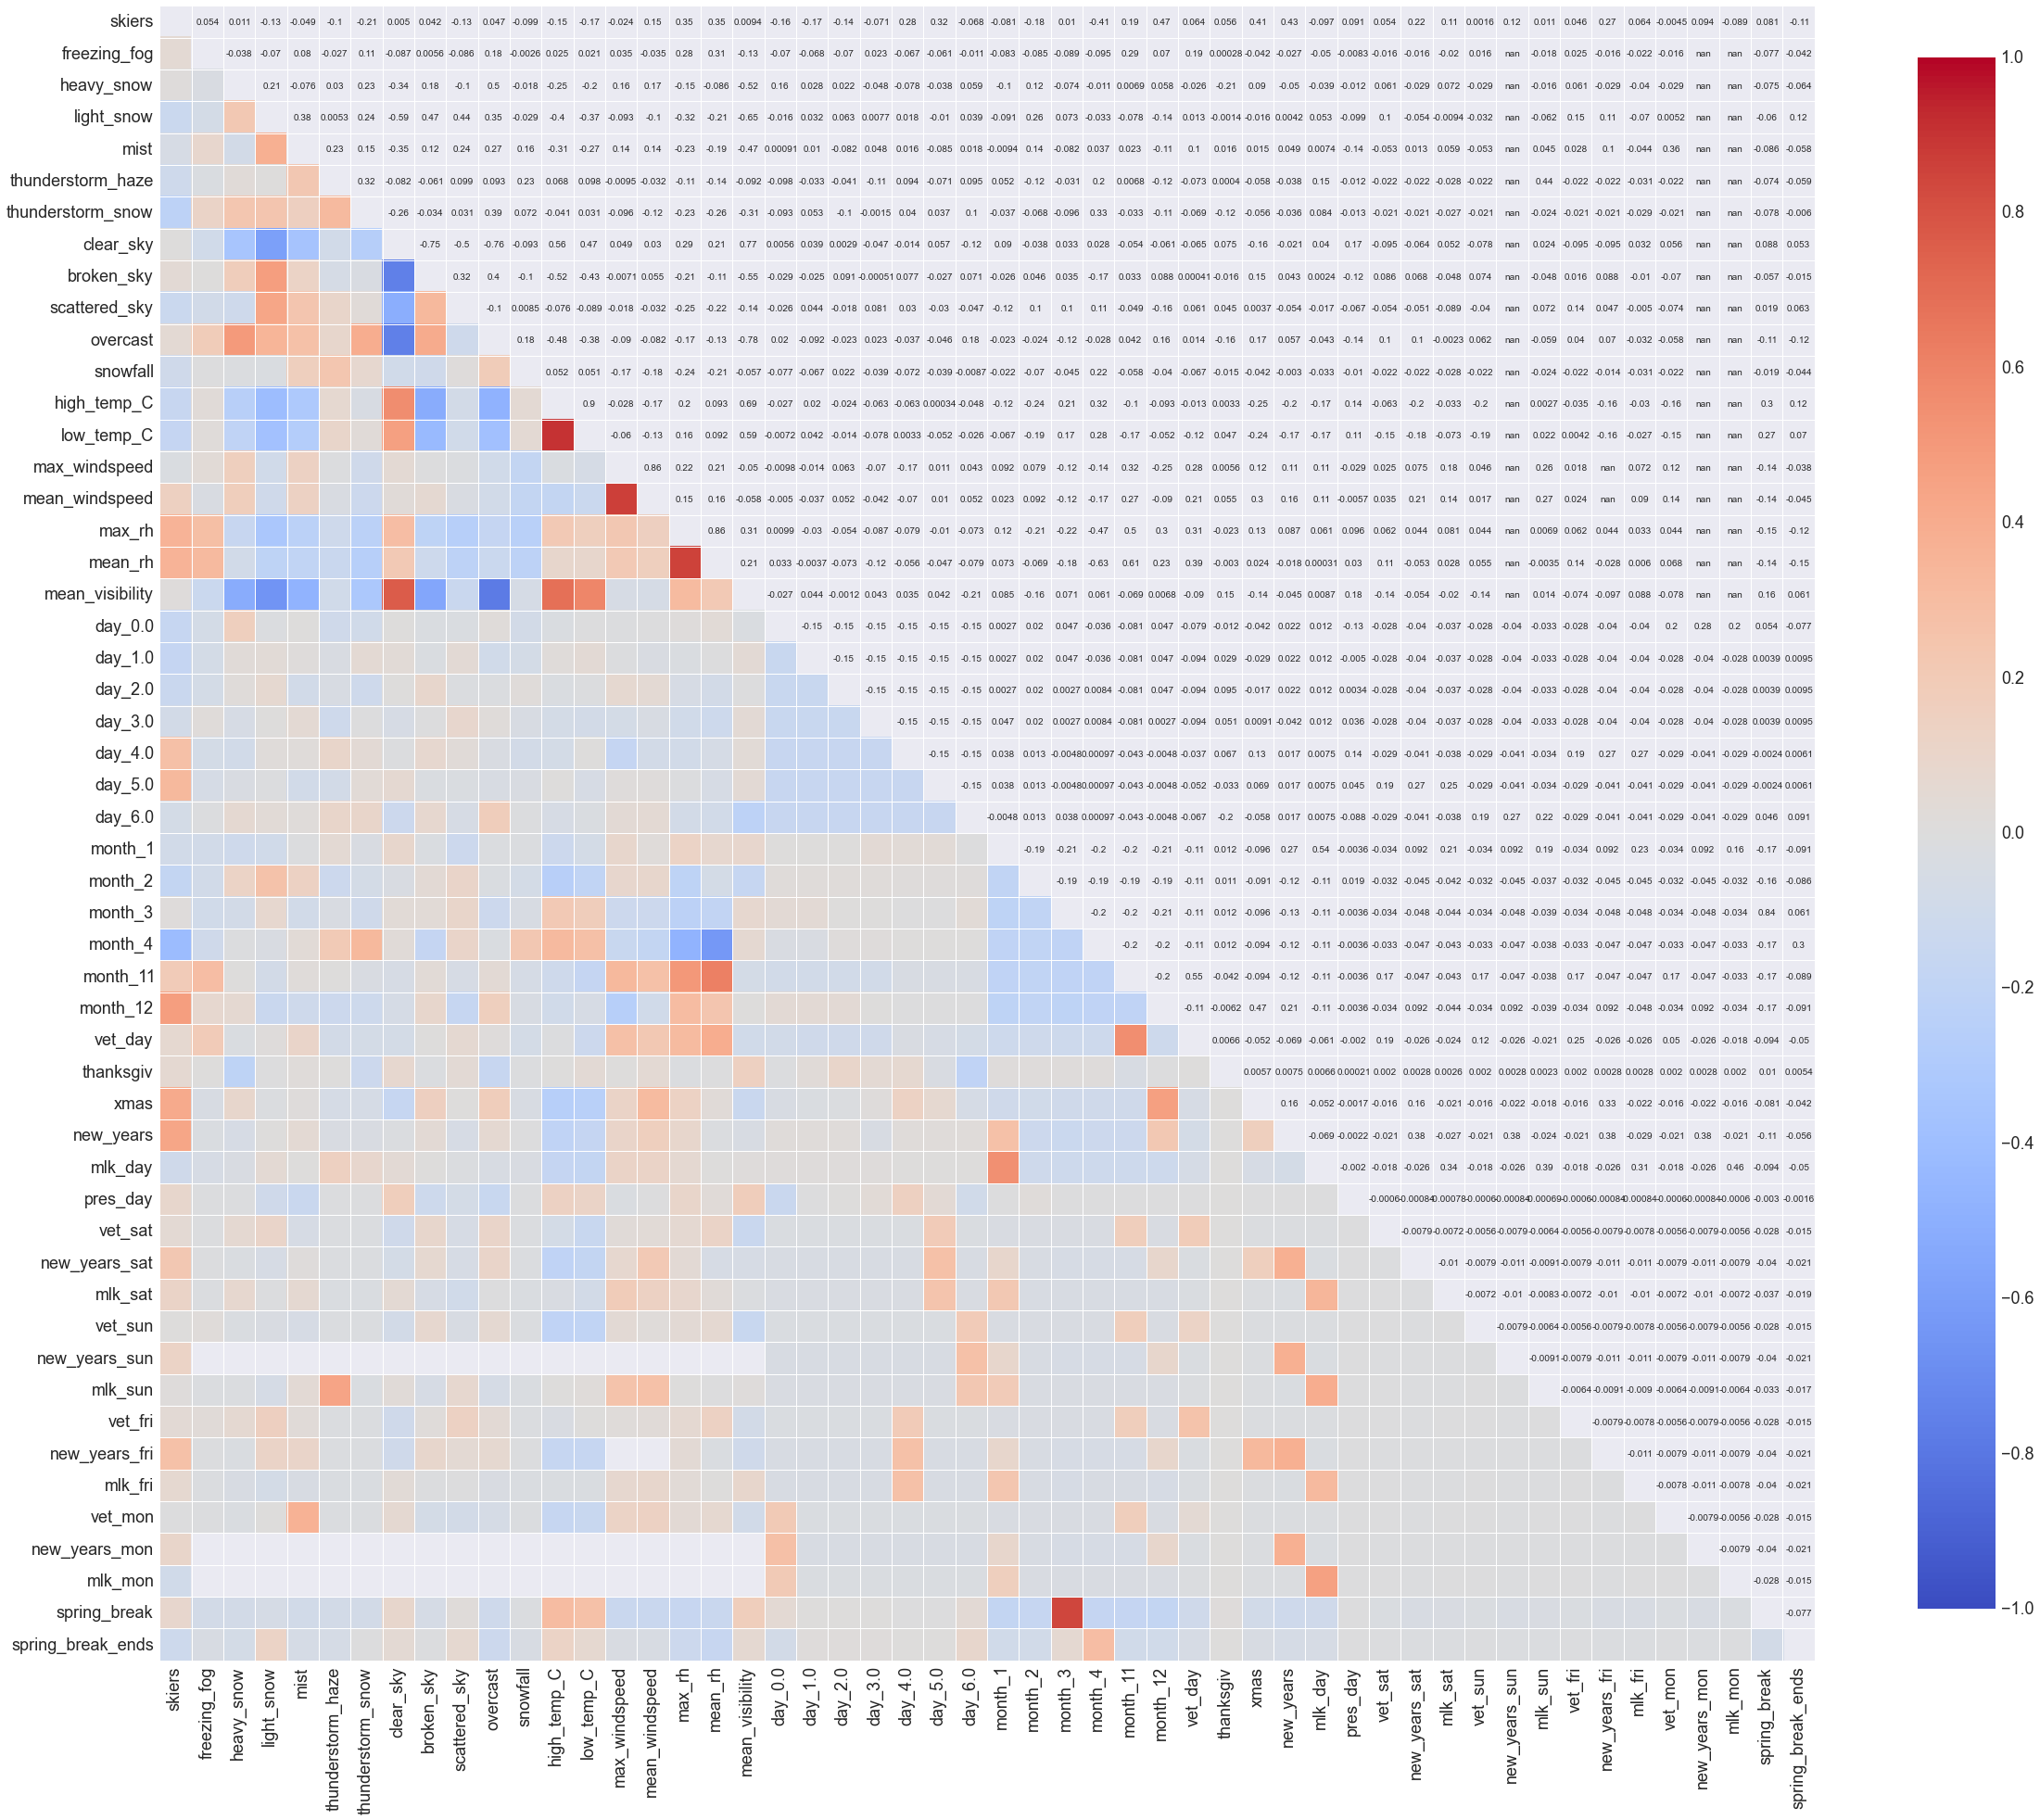

In [768]:
f, ax = plt.subplots(figsize=(40, 40))
sns.corrplot(df_all, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

In [769]:
df_all.fillna(df_all.mean(), inplace=True)

,skiers,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,...,new_years_sun,mlk_sun,vet_fri,new_years_fri,mlk_fri,vet_mon,new_years_mon,mlk_mon,spring_break,spring_break_ends
2014-11-01,-59.195122,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,0.138889,...,0,0,0,0,0,0,0,0,0,0
2014-11-02,-59.195122,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,0.289855,...,0,0,0,0,0,0,0,0,0,0
2014-11-03,-59.195122,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,0.080645,...,0,0,0,0,0,0,0,0,0,0
2014-11-04,-59.195122,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2014-11-05,-59.195122,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,0.055556,...,0,0,0,0,0,0,0,0,0,0
2014-11-06,-59.195122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2014-11-07,-59.195122,0.000000,0.000000,0.028169,0.014085,0.000000,0.000000,0.577465,0.084507,0.323944,...,0,0,0,0,0,0,0,0,0,0
2014-11-08,-59.195122,0.228571,0.000000,0.000000,0.085714,0.000000,0.000000,0.657143,0.000000,0.042857,...,0,0,0,0,0,0,0,0,0,0
2014-11-09,-59.195122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2014-11-10,-59.195122,0.000000,0.061538,0.046154,0.015385,0.000000,0.000000,0.153846,0.200000,0.292308,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [770]:
lr = linear_model.LinearRegression()

In [771]:
columns = list(df_all.columns.values)
columns.remove('skiers')

In [772]:
X = df_all[columns].values
y = df_all.skiers.values

In [773]:
mdl = lr.fit(X, y) 

In [774]:
cv_pred = cross_val_predict(lr, X, y, cv = 10)

In [775]:
cv_score = cross_val_score(lr, X, y, cv = 10)

In [776]:
cv_score.mean()

-3.8727029204032144

In [777]:
clf = linear_model.Lasso(alpha=0.01)
lasso = clf.fit(X, y)
cv_pred_lasso = cross_val_predict(lasso, X, y, cv = 10)

In [778]:
pred = mdl.predict(X)
df_all['model_pred'] = pred
df_all['cv_lin_pred'] = cv_pred
df_all['lasso_pred'] = cv_pred_lasso

In [779]:
ref_column = 'skiers'

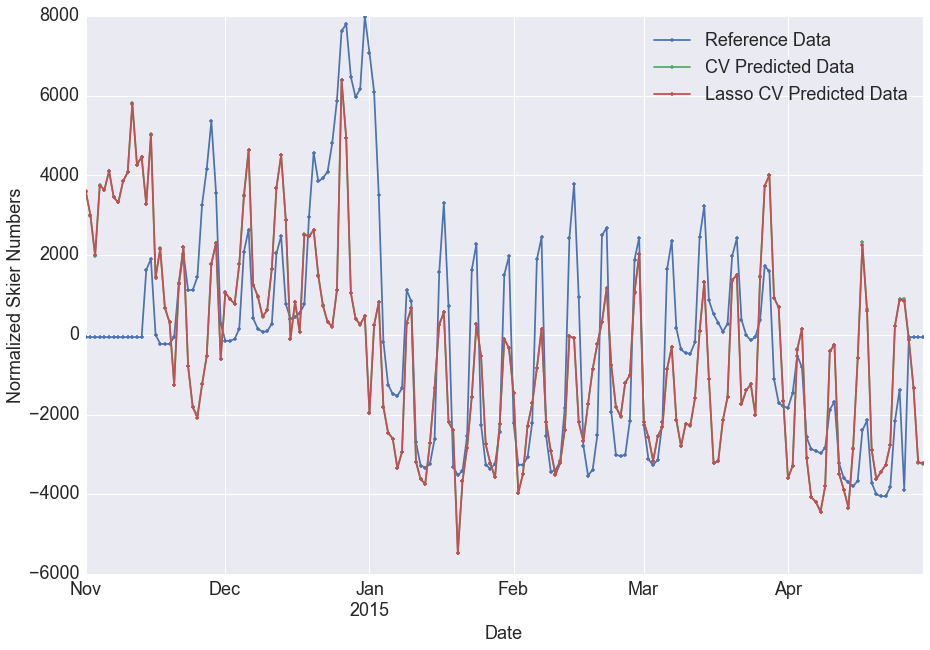

In [780]:
plot_fitted_and_ref_vs_time(df_all, ref_column)

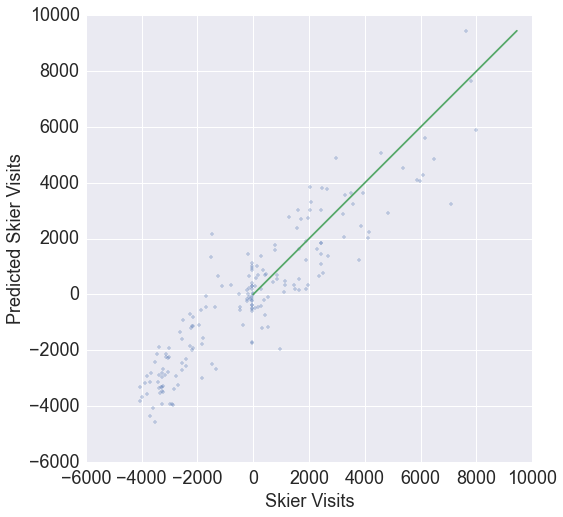

In [781]:
fitted_vs_ref_plot(df_all, ref_column)

In [782]:
df_all.head()

,skiers,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,...,new_years_fri,mlk_fri,vet_mon,new_years_mon,mlk_mon,spring_break,spring_break_ends,model_pred,cv_lin_pred,lasso_pred
2014-11-01,-59.195122,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,0.138889,...,0,0,0,0,0,0,0,950.319154,3591.108836,3597.973148
2014-11-02,-59.195122,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,0.289855,...,0,0,0,0,0,0,0,293.377511,2986.219794,2995.366507
2014-11-03,-59.195122,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,0.080645,...,0,0,0,0,0,0,0,-46.903050,1977.498779,1991.163920
2014-11-04,-59.195122,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,0.000000,...,0,0,0,0,0,0,0,1113.756494,3760.787462,3740.533842
2014-11-05,-59.195122,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,0.055556,...,0,0,0,0,0,0,0,879.956589,3641.196753,3643.622627


# Export Data

In [783]:
df_out = df_all.drop(['model_pred','skiers'], axis=1)

In [784]:
df_out.to_csv('../webpage_ski/df_all_features.csv')

In [785]:
import cPickle as pickle

In [786]:
pickle_out = open('lin_regr.pkl', 'wb')
pickle.dump(mdl, pickle_out)
pickle_out.close()